In [1]:
import numpy as np
import os
from tqdm import tqdm
import cv2

In [2]:
fracture = "/kaggle/input/fracture-classification-dataset/FracAtlas/images/Fractured"
non_fracture = "/kaggle/input/fracture-classification-dataset/FracAtlas/images/Non_fractured"

In [3]:
features = []
for img in tqdm(os.listdir(fracture)):
    img_path = os.path.join(fracture,img)
    img_feature = cv2.imread(img_path)
    img_feature = cv2.resize(img_feature,(225,225))
    features.append(img_feature)
    
for img in tqdm(os.listdir(non_fracture)):
    img_path = os.path.join(non_fracture,img)
    img_feature = cv2.imread(img_path)
    img_feature = cv2.resize(img_feature,(225,225))
    features.append(img_feature)

  0%|          | 0/3366 [00:00<?, ?it/s]Premature end of JPEG file
Premature end of JPEG file
 25%|██▌       | 857/3366 [00:10<00:41, 59.84it/s]Premature end of JPEG file
Premature end of JPEG file
 46%|████▌     | 1536/3366 [00:19<00:17, 106.83it/s]Premature end of JPEG file
Premature end of JPEG file
 47%|████▋     | 1570/3366 [00:19<00:13, 131.60it/s]Premature end of JPEG file
Premature end of JPEG file
 52%|█████▏    | 1738/3366 [00:21<00:21, 75.18it/s]Premature end of JPEG file
Premature end of JPEG file
 52%|█████▏    | 1761/3366 [00:21<00:20, 77.05it/s]Premature end of JPEG file
Premature end of JPEG file
 73%|███████▎  | 2467/3366 [00:31<00:12, 72.37it/s]Premature end of JPEG file
Premature end of JPEG file
 80%|███████▉  | 2680/3366 [00:33<00:05, 129.90it/s]Premature end of JPEG file
Premature end of JPEG file
100%|██████████| 3366/3366 [00:41<00:00, 80.41it/s] 


In [4]:
import numpy as np
X = np.array(features)

In [5]:
X.shape

(4083, 225, 225, 3)

In [6]:
labeles= []

for img in os.listdir(fracture):
    labeles.append(0)
    
for img in os.listdir(non_fracture):
    labeles.append(1)

In [7]:
y = np.array(labeles)

In [8]:
y.shape

(4083,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)


In [11]:
X_trainS = (X_train - X_train.min())/(X_train.max() - X_train.min())
X_testS = (X_test - X_test.min())/(X_test.max() - X_test.min())

In [12]:
from keras.utils import to_categorical
y_trainE = to_categorical(y_train)
y_testE = to_categorical(y_test)

2024-04-13 17:20:24.330778: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 17:20:24.330871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 17:20:24.473336: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:
from keras.models import Sequential
from keras.layers import Dense , Flatten , Dropout , MaxPooling2D , Conv2D

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(225, 225, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Add dropout with rate 0.2 to prevent overfitting

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Add dropout with rate 0.2 to prevent overfitting

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Add dropout with rate 0.2 to prevent overfitting

# Reduce model complexity (consider reducing filter numbers if needed)
model.add(Conv2D(128, (3, 3), activation='relu'))  # Consider reducing filters here
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Add dropout with rate 0.2 to prevent overfitting

model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 223, 223, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │       294,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,402 (1.50 MB)

 Trainable params: 392,402 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [29]:
history = model.fit(X_trainS, y_trainE , validation_data = (X_testS, y_testE) , epochs = 10)

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.8221 - loss: 0.5314 - val_accuracy: 0.8446 - val_loss: 0.4663
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8054 - loss: 0.4961 - val_accuracy: 0.8446 - val_loss: 0.4553
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8275 - loss: 0.4460 - val_accuracy: 0.8446 - val_loss: 0.4900
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8165 - loss: 0.4423 - val_accuracy: 0.8446 - val_loss: 0.4696
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8329 - loss: 0.4037 - val_accuracy: 0.8446 - val_loss: 0.4597
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8260 - loss: 0.4854 - val_accuracy: 0.8446 - val_loss: 0.4346
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8141 - loss: 0.4135 - val_accuracy: 0.8446 - val_loss: 0.4288
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8131 - loss: 0.4049 - val_ac

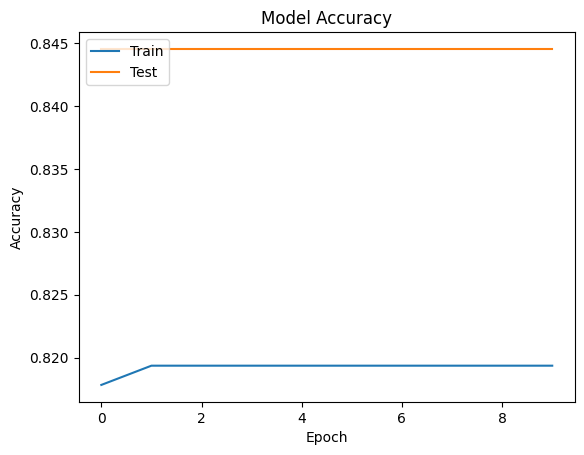

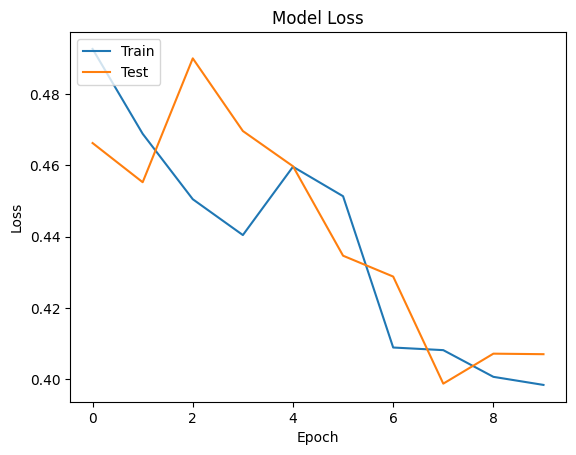

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [35]:
# Save the model (weights and architecture)

model.save('fracture_cnn_model.h5')


In [37]:
eval = model.evaluate(X_testS, y_testE)
print(eval)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8419 - loss: 0.4059
[0.40702706575393677, 0.8445532321929932]


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the model (assuming you have a saved model)
model = load_model('fracture_cnn_model.h5')

# ... (your code to load test data)

# Make predictions on the test data
y_pred = np.argmax(model.predict(X_testS), axis=-1)  # Alternative for newer Keras versions

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Function to plot the confusion matrix as a heatmap
def plot_confusion_matrix(cm, class_names, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  """
  Plots a confusion matrix as a heatmap.

  Args:
      cm (numpy.ndarray): The confusion matrix.
      # ... (other arguments)

  # Print the confusion matrix values (optional)
  print(cm)
  """

  # ... (function definition for plotting the heatmap)

# Plot confusion matrix
plot_confusion_matrix(cm, ['Non-fractured', 'Fractured'])

# Classification report
print("Classification Report")
print(classification_report(y_test, y_pred))


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.84      1.00      0.92       690

    accuracy                           0.84       817
   macro avg       0.42      0.50      0.46       817
weighted avg       0.71      0.84      0.77       817



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
plot_confusion_matrix(cm, ['Non-fractured', 'Fractured'])


In [56]:
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix values (optional)
print(cm)


[[  0 127]
 [  0 690]]


<Axes: >

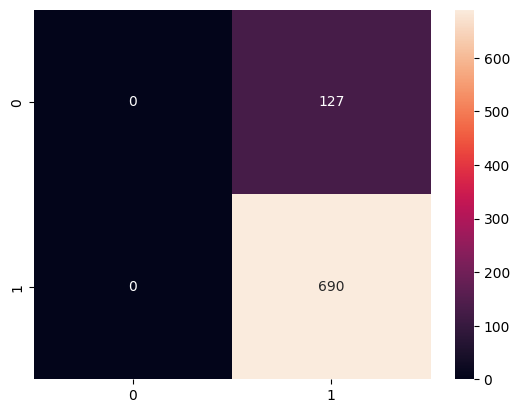

In [59]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='d')